In [1]:
import fnmatch
import glob
import os
import re
from time import sleep
from zipfile import ZipFile
from datetime import datetime, timedelta
import requests
session = requests.Session()

from requests_html import HTMLSession
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm  # progress bar on loops
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import PyPDF2
import matplotlib.pyplot as plt

In [2]:
xlb = pd.read_csv('ETFdata/XLB.csv')
xle = pd.read_csv('ETFdata/XLE.csv')
xlf = pd.read_csv('ETFdata/XLF.csv')
xli = pd.read_csv('ETFdata/XLI.csv')
xlk = pd.read_csv('ETFdata/XLK.csv')
xlp = pd.read_csv('ETFdata/XLP.csv')
xlre = pd.read_csv('ETFdata/XLRE.csv')
xlu = pd.read_csv('ETFdata/XLU.csv')
xlv = pd.read_csv('ETFdata/XLV.csv')
xly = pd.read_csv('ETFdata/XLY.csv')
xlc = pd.read_csv('ETFdata/XLc.csv')


In [3]:
dfs = pd.concat([xlb, xle, xlf, xli, xlk, xlp, xlre, xlu, xlv, xly, xlc], ignore_index=True)
dfs

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,XLB,2021/9/7,85.070000,85.129997,84.690002,84.809998,81.769379,6932300,NaN
1,XLB,2021/9/8,84.559998,84.639999,83.709999,84.000000,80.988419,6210000,-0.0100
2,XLB,2021/9/9,83.760002,84.599998,83.760002,84.029999,81.017342,4935700,0.0000
3,XLB,2021/9/10,84.419998,85.050003,83.959999,84.010002,80.998062,8890100,0.0000
4,XLB,2021/9/13,84.750000,85.000000,83.459999,83.989998,80.978775,7610000,0.0000
...,...,...,...,...,...,...,...,...,...
3834,XLC,2023/1/19,50.970001,51.755001,50.799999,51.490002,51.349598,7387400,0.0051
3835,XLC,2023/1/20,51.910000,53.155998,51.770000,53.099998,52.955204,4874200,0.0313
3836,XLC,2023/1/23,53.150002,54.154999,53.020000,54.029999,53.882671,6279000,0.0175
3837,XLC,2023/1/24,53.580002,54.650002,53.412998,53.880001,53.733082,8867000,-0.0028


In [4]:
fed_20210924 = PyPDF2.PdfReader('Fed/20210924.pdf')
fed_20211109 = PyPDF2.PdfReader('Fed/20211109.pdf')
fed_20211129 = PyPDF2.PdfReader('Fed/20211129.pdf')
fed_20220321 = PyPDF2.PdfReader('Fed/20220321.pdf')
fed_20220524 = PyPDF2.PdfReader('Fed/20220524.pdf')
fed_20220617 = PyPDF2.PdfReader('Fed/20220617.pdf')
fed_20220826 = PyPDF2.PdfReader('Fed/20220826.pdf')
fed_20220928 = PyPDF2.PdfReader('Fed/20220928.pdf')
fed_20221130 = PyPDF2.PdfReader('Fed/20221130.pdf')
fed_20230110 = PyPDF2.PdfReader('Fed/20230110.pdf')


In [5]:
announce_date = pd.DataFrame({'Date': ['2021/09/24', '2021/11/09', '2021/11/29', '2022/03/21', '2022/05/24', '2022/06/17', '2022/08/26', '2022/09/28', '2022/11/30', '2023/01/11']})
announce_date['Date'] = pd.to_datetime(announce_date['Date'])

In [6]:
dfs['Date'] = pd.to_datetime(dfs['Date'])

In [7]:
df = pd.merge(dfs, announce_date, on='Date')

dates = pd.date_range(df['Date'].min()-pd.Timedelta(days=10), df['Date'].max()+pd.Timedelta(days=10), freq='D')

returns = []
for date in dates:
    for ticker in dfs['Ticker'].unique():
        mask = (dfs['Date'] == date) & (dfs['Ticker'] == ticker)
        df_temp = dfs.loc[mask, :]
        if not df_temp.empty:
            returns.append({'Date': date, 'Ticker': ticker, 'Return': df_temp['Return'].values[0]})
        

returns = pd.DataFrame(returns)
print(returns)

           Date Ticker  Return
0    2021-09-14    XLB -0.0110
1    2021-09-14    XLE -0.0140
2    2021-09-14    XLF -0.0134
3    2021-09-14    XLI -0.0120
4    2021-09-14    XLK -0.0010
...         ...    ...     ...
3746 2023-01-20   XLRE  0.0116
3747 2023-01-20    XLU  0.0060
3748 2023-01-20    XLV  0.0050
3749 2023-01-20    XLY  0.0242
3750 2023-01-20    XLC  0.0313

[3751 rows x 3 columns]


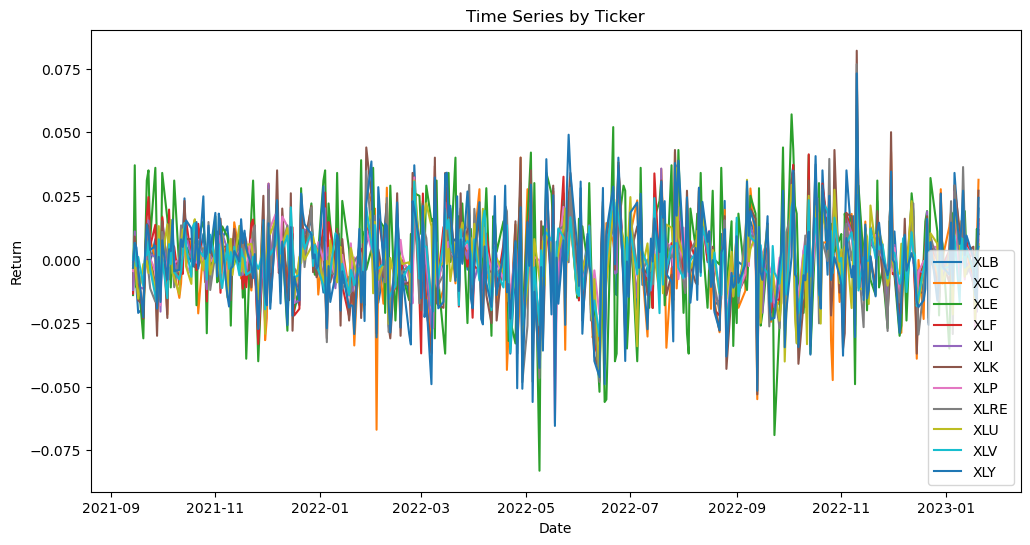

In [8]:
ticker_group = returns.groupby('Ticker')

fig, ax = plt.subplots(figsize=(12, 6))
for ticker, data in ticker_group:
    ax.plot(data['Date'], data['Return'], label=ticker)

ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.set_title('Time Series by Ticker')
ax.legend()

plt.show()

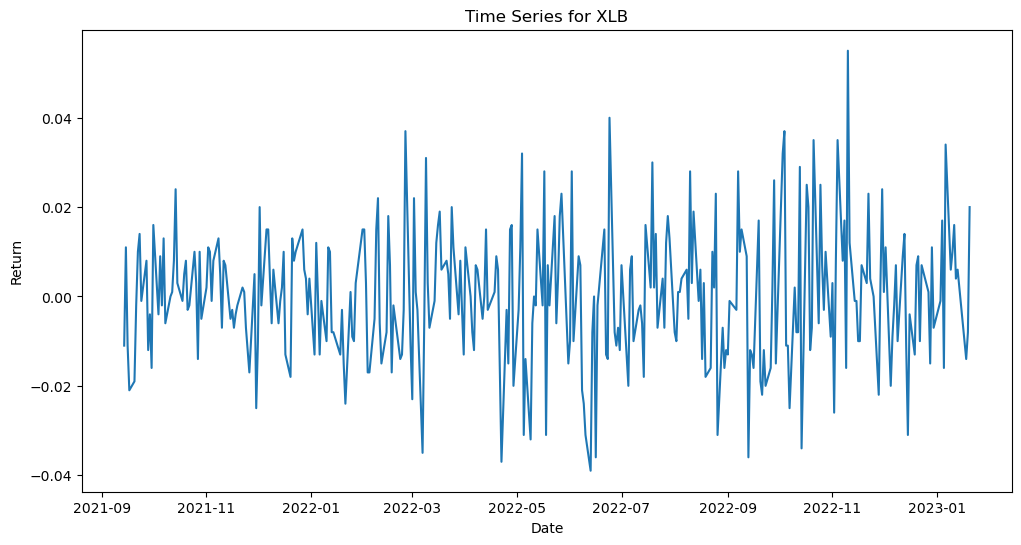

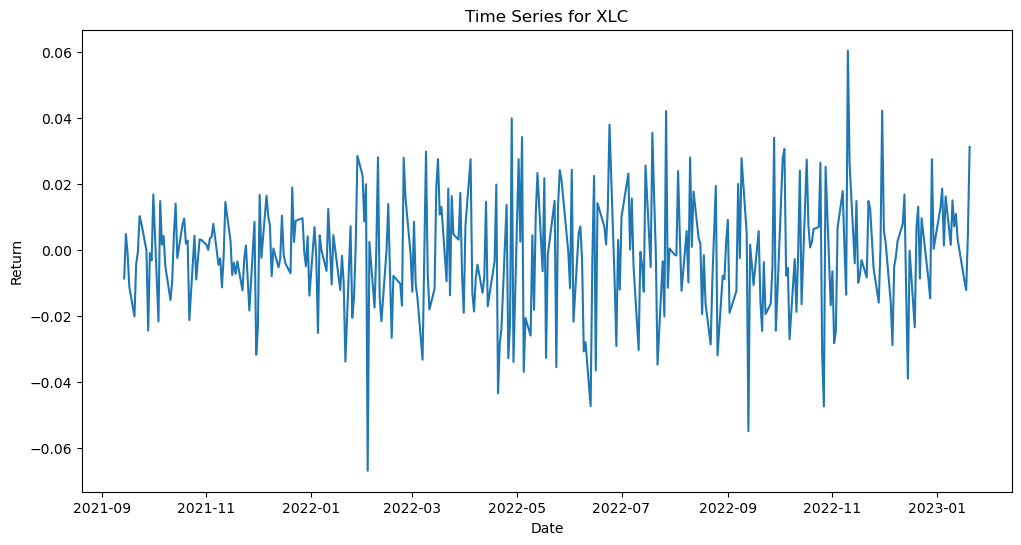

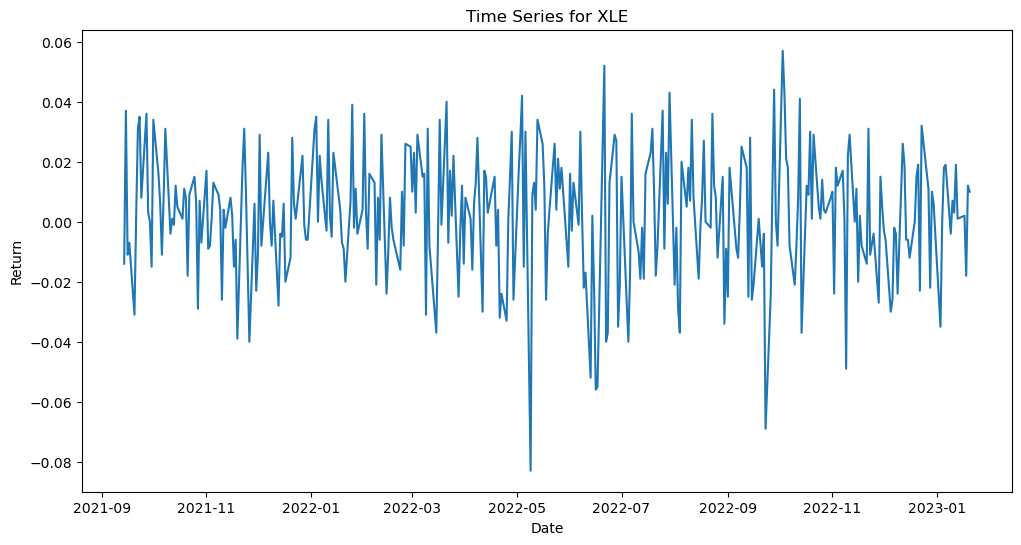

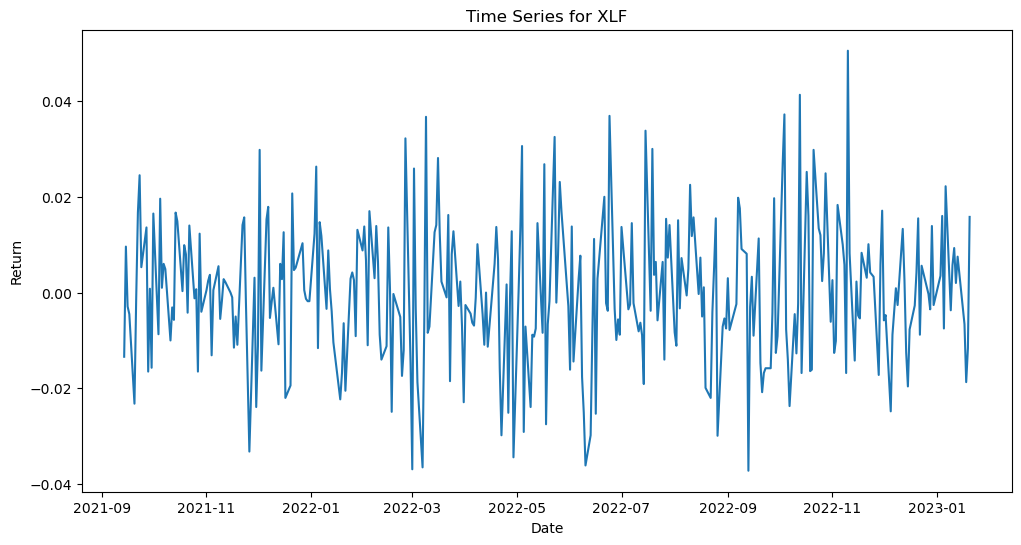

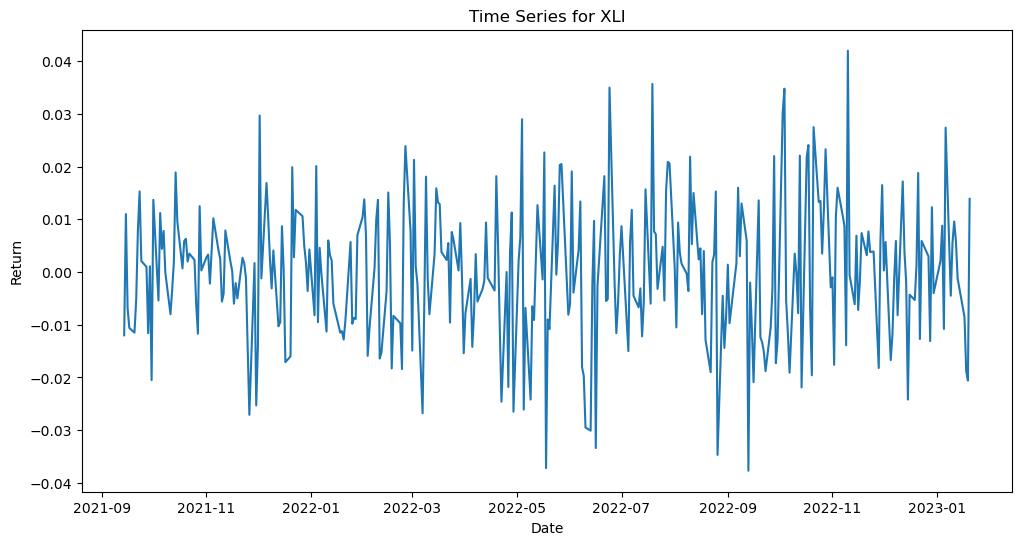

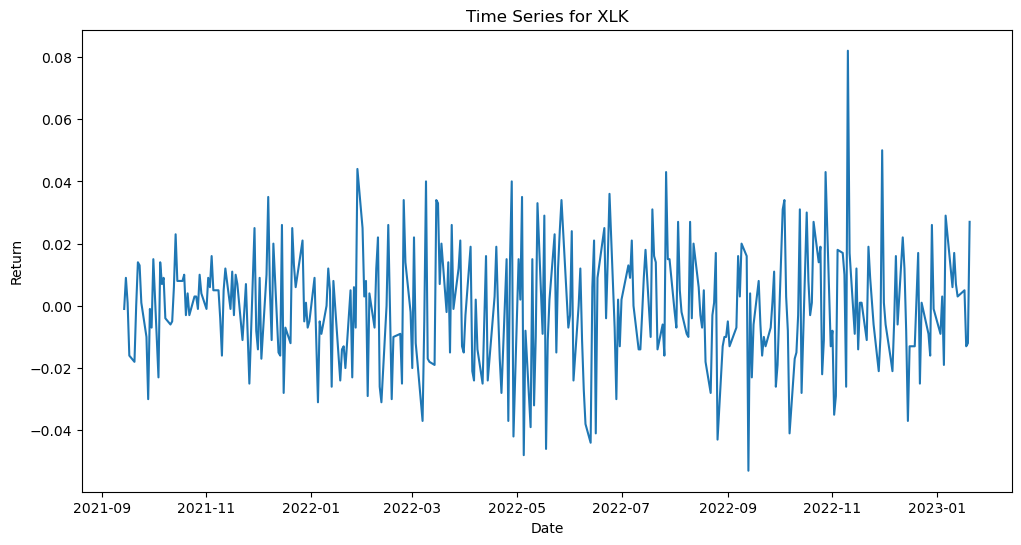

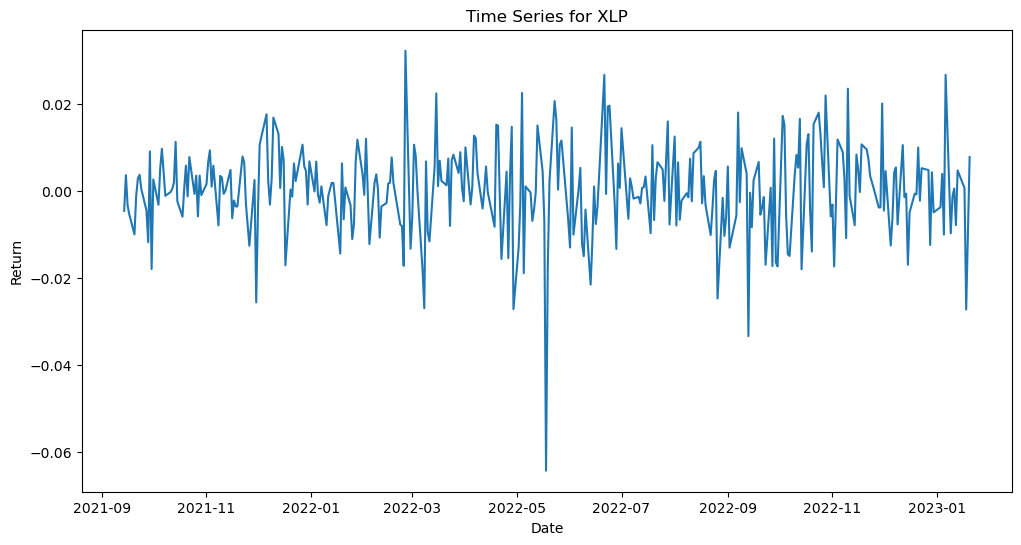

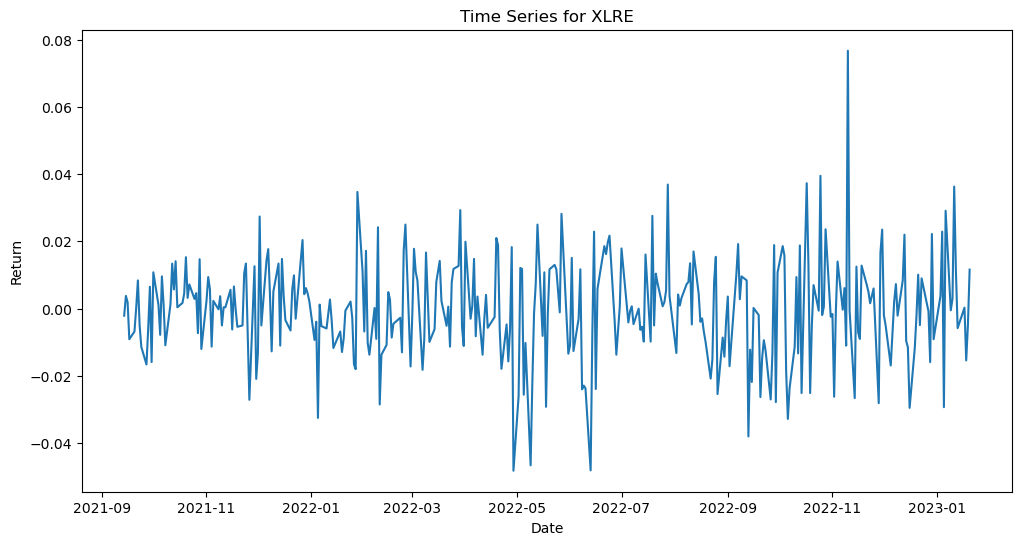

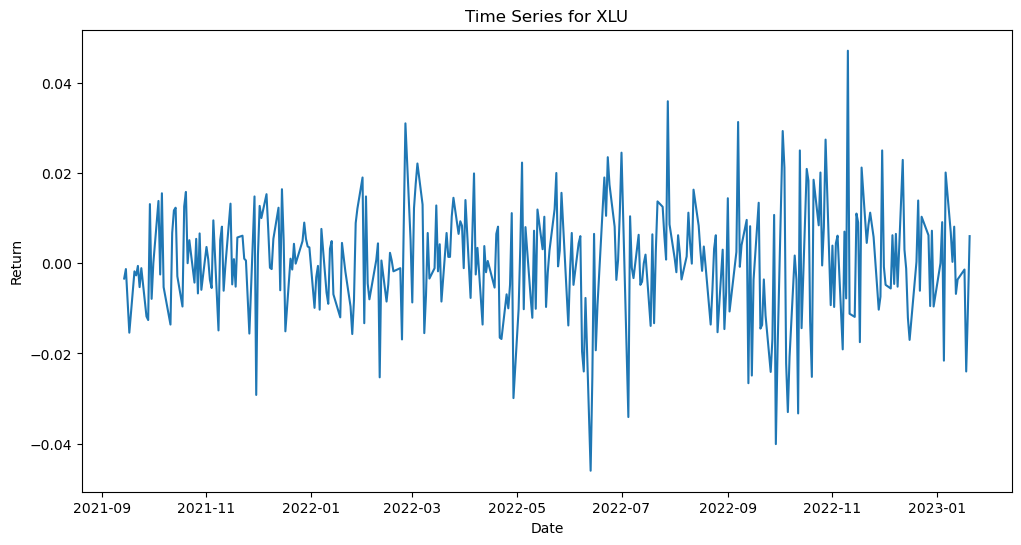

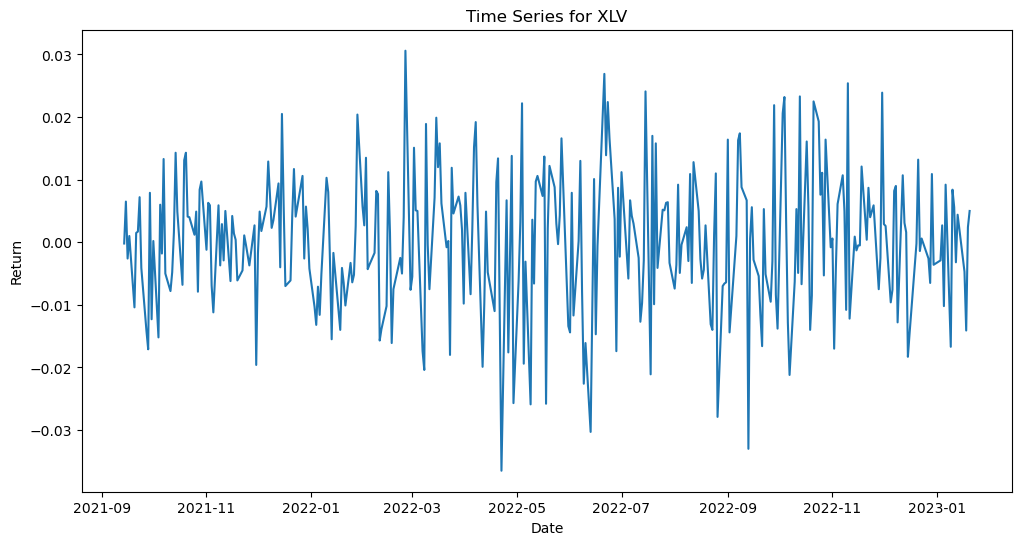

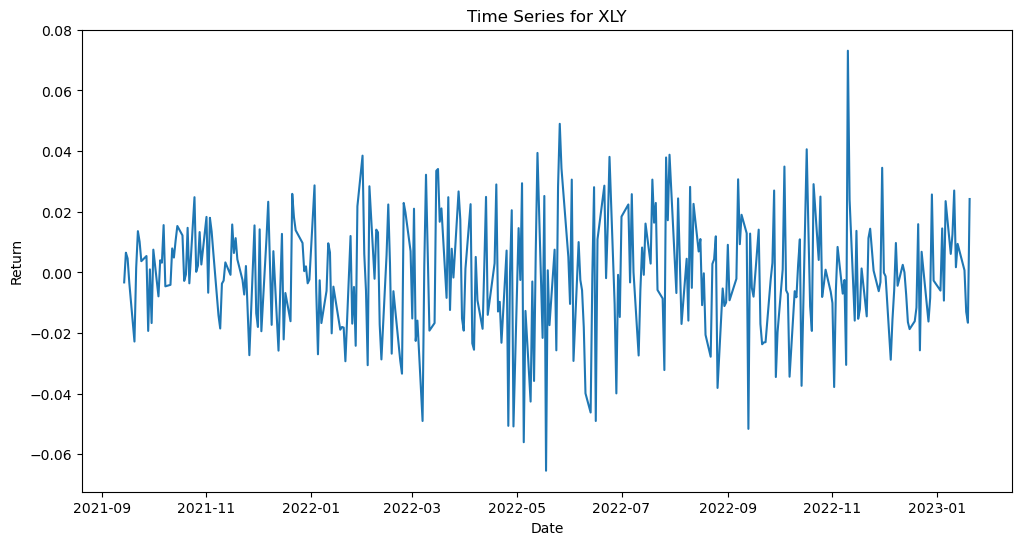

In [9]:
ticker_groups = returns.groupby('Ticker')
ticker_groups
# 绘制时间序列
for ticker, data in ticker_groups:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(data['Date'], data['Return'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Return')
    ax.set_title(f'Time Series for {ticker}')
    plt.show()